In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 Setting 
$$
M_0 = \delta v \sum_i T_i
$$
and
$$
M_1 = \frac{\sum_i T_i v_i }{\sum_i T_i} = \frac{\delta v}{M_0}\sum_i T_i v_i 
$$
This considers the quadrature error propagation formula and the error on $T_i$ given as $\sigma_i$, which is appropriate under the assumption that the $\sigma_i$ are uncorrelated.  In general, we treat
$$
\frac{\partial T_i }{\partial T_j} = \delta_{ij}
$$

$$
\sigma_{M1}^2  = \sum_i \left(\frac{\partial M_1}{\partial T_i}\right)^2 \sigma_i^2 \\
 =  \sum_i \left( \frac{v_i}{M_0} + \frac{\partial}{\partial T_i}\frac{1}{M_0}\right)^2 \sigma_i^2\\
 =  \sum_i \left(\frac{v_i}{M_0}-\sum_j v_j T_j \frac{\delta v}{M_0^2} \right)^2 \sigma_i^2\\
 =  \sum_i \left(\frac{v_i}{M_0}- \frac{M_1 \delta v}{M_0^2} \right)^2 \sigma_i^2\\
$$


[This](http://stats.stackexchange.com/questions/25895/computing-standard-error-in-weighted-mean-estimation) stack overflow seems to indicate disagreement is expected.  They refer to a stats paper [here](http://www.cs.tufts.edu/~nr/cs257/archive/donald-gatz/weighted-standard-error.pdf) gives an estimator validated from boostrapping.

Setting $\bar{T} = N^{-1} \sum T_i$.

$$
\frac{N}{(N-1) M_0^2 } \left[ \sum_i \left(T_i v_i - \bar{T} M_1 \right)^2 - 2 M_1 \sum_i (T_i - \bar{T})(T_i v_i - \bar{T} M_1) + M_1^2 \sum_i (T_i - \bar{T})^2\right]
$$


In [120]:
ntrials = 10000
snr = 5
noise = 1.0/snr
v = np.linspace(0,10,301)
mom0estimator = np.zeros(ntrials)
mom1estimator = np.zeros(ntrials)
mom1varest = np.zeros(ntrials)
mom1varest_ewr = np.zeros(ntrials)
mom1varest_akl = np.zeros(ntrials)
mom1varest_stats = np.zeros(ntrials)
mom0varest = np.zeros(ntrials)
line = np.exp(-(v-np.pi)**2/(2*np.exp(-2)))

for idx in np.arange(ntrials):
    noisy = line + 1.0/snr * np.random.randn(len(v))
    mom0 = np.sum(noisy)
    mom0estimator[idx] = mom0
    mom1estimator[idx] = np.sum(noisy * v)/mom0
    mom1varest_ewr[idx] = (1.0/snr)**2 * np.sum(((v * mom0 - mom1estimator[idx])/ mom0**2)**2)
    mom1varest_akl[idx] = (1/mom0) *  np.sqrt(np.sum((v-mom1estimator[idx])*noise)**2)
    n = len(noisy)
    wtmean = np.sum(noisy * v) / np.sum(noisy)
    wtbar = np.mean(noisy)
    wt = noisy
    mom1varest_stats[idx] = n/((n-1)*np.sum(wt)**2)*\
        (np.sum((wt*v-wtbar*wtmean)**2)-
         2*wtmean*np.sum((wt-wtbar)*(wt*v-wtbar*wtmean))+
         wtmean**2*np.sum((wt-wtbar)**2))

Std. Deviation of Estimator: 0.438403024153
Stats Estimator: 0.45327367031
EWR Estimator: 0.724106590224
AKL Estimator: 2.03240640731


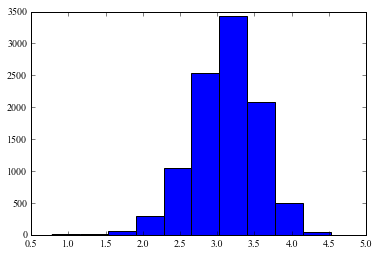

In [121]:
plt.hist(mom1estimator)
print "Std. Deviation of Estimator: {0}".format(np.std(mom1estimator))
print "Stats Estimator: {0}".format(np.mean(mom1varest_stats**0.5))
print "EWR Estimator: {0}".format(np.mean(mom1varest_ewr**0.5))
print "AKL Estimator: {0}".format(np.mean(mom1varest_akl**0.5))